<a href="https://colab.research.google.com/github/PedroFatec/MineracaoDeDados/blob/main/02_Visualizar_dados_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explorando dados com Python – visualize dados**

Neste caderno, aplicaremos algumas técnicas para analisar dados com estatísticas básicas e visualizá-los por meio de gráficos.

# Carregando nossos dados

Antes de começarmos, vamos carregar os mesmos dados sobre horas de estudo que analisamos no caderno anterior. Também recalcularemos quem passou na aula da mesma forma que da última vez.

Execute o código na célula abaixo clicando no botão ► Executar para ver os dados.

In [1]:
import pandas as pd

# Carregar dados de um link
!wget https://raw.githubusercontent.com/ProfAndersonVanin/FATEC_MINERACAO_DADOS_2SEM2024/main/grades.csv
df_alunos = pd.read_csv('grades.csv',delimiter=',',header='infer')

--2024-08-24 12:59:08--  https://raw.githubusercontent.com/ProfAndersonVanin/FATEC_MINERACAO_DADOS_2SEM2024/main/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv’

grades.csv          100%[===================>]     322  --.-KB/s    in 0s      

2024-08-24 12:59:08 (13.9 MB/s) - ‘grades.csv’ saved [322/322]



In [2]:
df_alunos

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [3]:
# Remova todas as linhas com dados ausentes
df_alunos = df_alunos.dropna(axis=0, how='any')

In [4]:
df_alunos

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [5]:
# Calcule quem passou, assumindo que '60' é a nota necessária para passar
passes  = pd.Series(df_alunos['Grade'] >= 60)

In [6]:
passes

,Grade
0,False
1,False
2,False
3,True
4,False
5,False
6,False
7,False
8,False
9,True


In [7]:
# Salve quem passou para o dataframe do Pandas
df_alunos = pd.concat([df_alunos, passes.rename("Passou")], axis=1)

In [8]:
# Imprima o resultado neste caderno
df_alunos

,Name,StudyHours,Grade,Passou
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


## Visualizando dados com Matplotlib

DataFrames fornecem uma ótima maneira de explorar e analisar dados tabulares, mas às vezes uma imagem vale mais que mil linhas e colunas. A biblioteca **Matplotlib** fornece a base para traçar visualizações de dados que podem melhorar muito sua capacidade de analisar os dados.

Vamos começar com um gráfico de barras simples que mostra a nota de cada aluno.

**Observação**: Este primeiro gráfico pode levar de um a dois minutos para ser renderizado. Os gráficos subsequentes serão renderizados mais rapidamente.

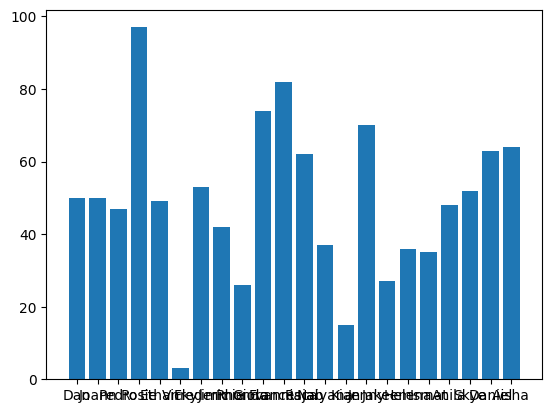

In [9]:
# Certifique-se de que os gráficos sejam exibidos em linha no notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Crie um gráfico de barras de nome x nota
plt.bar(x=df_alunos.Name, height=df_alunos.Grade)

# Exibir o gráfico
plt.show()

Bem, funcionou, mas o gráfico precisa de algumas melhorias para deixar mais claro o que estamos vendo.

Observe que você usou a classe pyplot do Matplotlib para traçar o gráfico. Esta classe oferece muitas maneiras de melhorar os elementos visuais do enredo. Por exemplo, o seguinte código:

Especifica a cor do gráfico de barras.
Adiciona um título ao gráfico (para sabermos o que ele representa)
Adiciona rótulos aos eixos X e Y (para sabermos qual eixo mostra quais dados)
Adiciona uma grade (para facilitar a determinação dos valores das barras)
Gira os marcadores X (para que possamos lê-los)

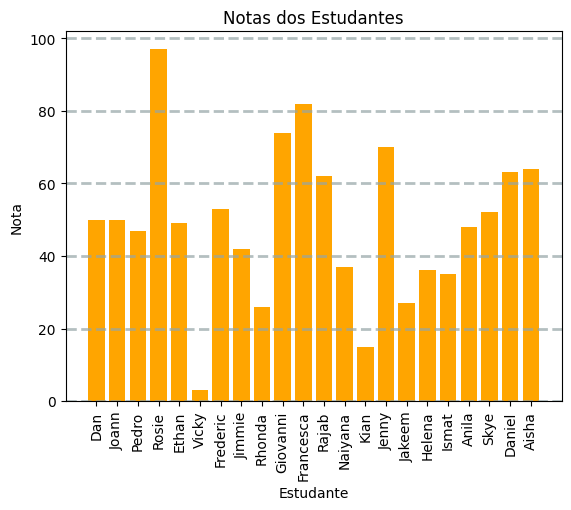

In [10]:
# Crie um gráfico de barras de nome x nota
plt.bar(x=df_alunos.Name, height=df_alunos.Grade, color='orange')

# Personalize o gráfico
plt.title('Notas dos Estudantes')
plt.xlabel('Estudante')
plt.ylabel('Nota')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

Um gráfico está tecnicamente contido em uma figura. Nos exemplos anteriores, a figura foi criada implicitamente para você, mas você pode criá-la explicitamente. Por exemplo, o código a seguir cria uma figura com um tamanho específico.

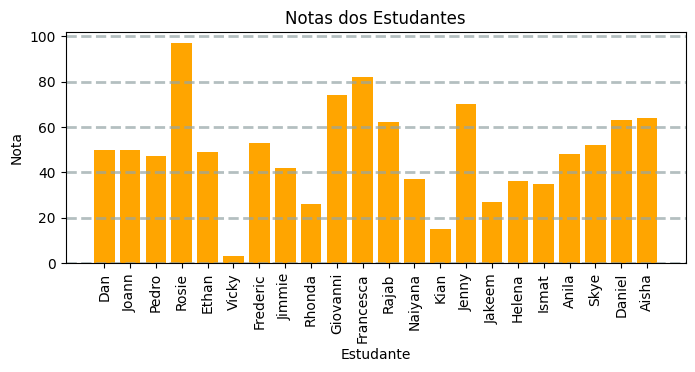

In [11]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=df_alunos.Name, height=df_alunos.Grade, color='orange')

# Customize the chart
plt.title('Notas dos Estudantes')
plt.xlabel('Estudante')
plt.ylabel('Nota')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

Uma figura pode conter múltiplas subparcelas, cada uma em seu próprio eixo.

Por exemplo, o código a seguir cria uma figura com dois subtramas: um é um gráfico de barras que mostra as notas dos alunos e o outro é um gráfico de pizza comparando o número de notas aprovadas com as notas não aprovadas.

<ipython-input-12-127e647dce34>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_alunos.Name, rotation=90)


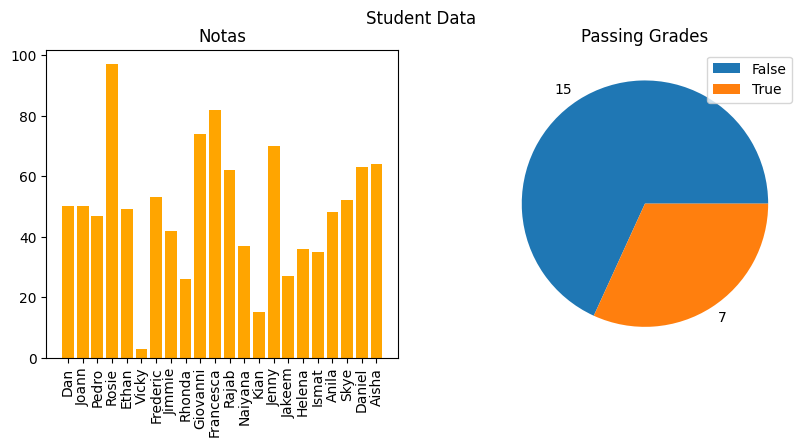

In [12]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_alunos.Name, height=df_alunos.Grade, color='orange')
ax[0].set_title('Notas')
ax[0].set_xticklabels(df_alunos.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_alunos['Passou'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

Até agora, você usou métodos do objeto `Matplotlib.pyplot` para plotar gráficos. No entanto, o Matplotlib é tão fundamental para os gráficos em Python que muitos pacotes, incluindo o Pandas, fornecem métodos que abstraem as funções subjacentes do Matplotlib e simplificam a plotagem. Por exemplo, o DataFrame fornece seus próprios métodos para plotar dados, conforme mostrado no exemplo a seguir, que plota um gráfico de barras de horas de estudo.

<Axes: xlabel='Name'>

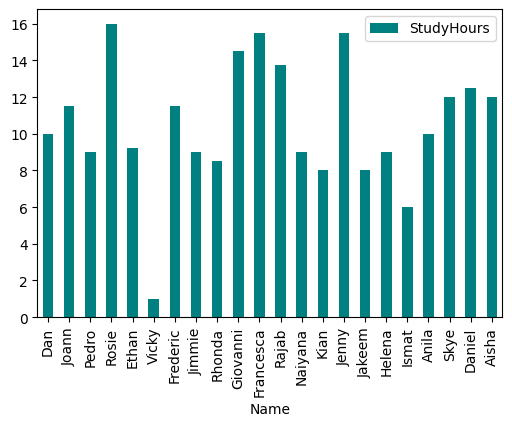

In [13]:
df_alunos.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

## Introdução à análise estatística

Agora que você sabe como usar Python para manipular e visualizar dados, pode começar a analisá-los.

Grande parte da ciência de dados está enraizada em *estatísticas*, por isso exploraremos algumas técnicas estatísticas básicas.

> **Observação**: Esta seção <u>não</u> se destina a ensinar estatística; esse é um tópico muito grande para este caderno. No entanto, apresentará alguns conceitos e técnicas estatísticas que os cientistas de dados usam à medida que exploram dados na preparação para a modelagem de aprendizado de máquina.

### Estatísticas descritivas e distribuição de dados

Ao examinar uma *variável* (por exemplo, uma amostra de notas de alunos), os cientistas de dados estão particularmente interessados ​​em sua *distribuição* (em outras palavras, como todos os diferentes valores de notas estão espalhados pela amostra). O ponto de partida para esta exploração é muitas vezes visualizar os dados como um histograma e ver com que frequência ocorre cada valor da variável.

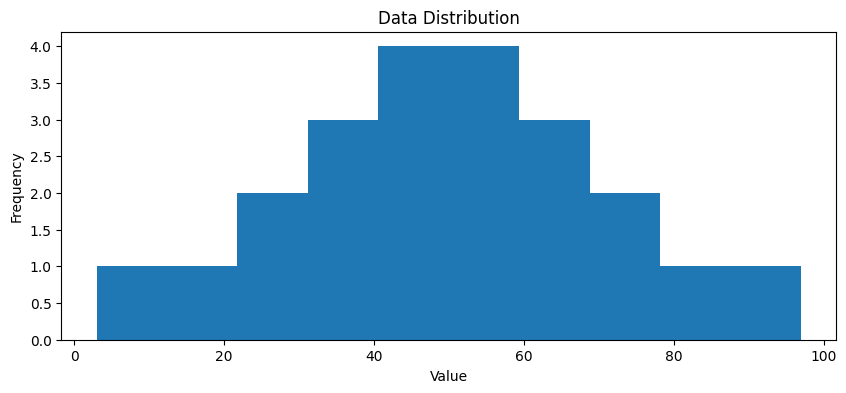

In [14]:
# Get the variable to examine
var_data = df_alunos['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

O histograma das notas tem uma forma simétrica, onde as notas que ocorrem com mais frequência tendem a estar no meio da faixa (cerca de 50), com menos notas nos extremos da escala.

#### Medidas de tendência central

Para compreender melhor a distribuição, podemos examinar as chamadas *medidas de tendência central*, que são uma forma sofisticada de descrever estatísticas que representam o “meio” dos dados. O objetivo desta análise é tentar encontrar um valor “típico”. As formas comuns de definir o meio dos dados incluem:

- A *média*: uma média simples baseada na soma de todos os valores do conjunto de amostras e depois na divisão do total pelo número de amostras.
- A *mediana*: O valor no meio do intervalo de todos os valores da amostra.
- O *modo*: o valor que ocorre mais comumente no conjunto de amostras<sup>\*</sup>.

Vamos calcular esses valores, juntamente com os valores mínimo e máximo para comparação, e mostrá-los no histograma.

> <sup>\*</sup>É claro que, em alguns conjuntos de amostras, pode haver um empate para o valor mais comum. Nesses casos, o conjunto de dados é descrito como *bimodal* ou mesmo *multimodal*.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



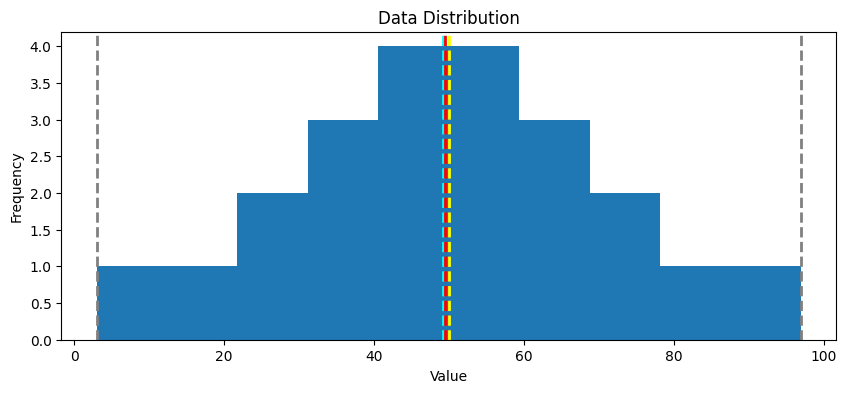

In [15]:
# Get the variable to examine
var = df_alunos['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

Para os dados de notas, a média, a mediana e a moda parecem estar mais ou menos no meio do mínimo e do máximo, em torno de 50.

Outra maneira de visualizar a distribuição de uma variável é usar um gráfico *caixa* (às vezes chamado de gráfico *caixa e bigodes*). Vamos criar um para os dados das notas.

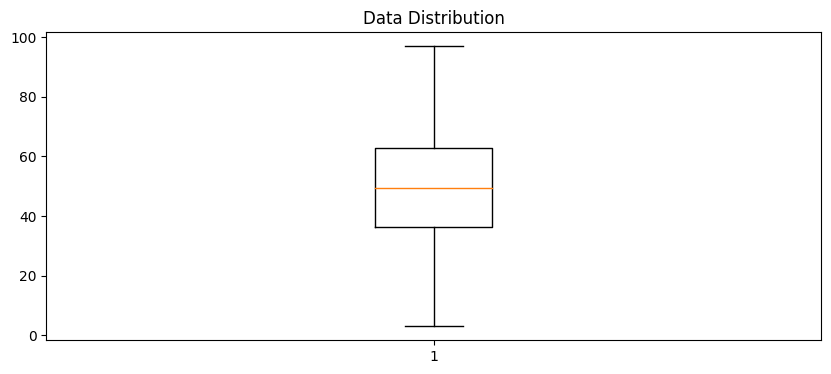

In [16]:
# Get the variable to examine
var = df_alunos['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

O box plot mostra a distribuição dos valores das notas em um formato diferente do histograma. A parte *caixa* do gráfico mostra onde residem os dois *quartis* internos dos dados. Neste caso, metade das notas está entre aproximadamente 36 e 63. Os *bigodes* que se estendem da caixa mostram os dois quartis externos, portanto a outra metade das notas neste caso está entre 0 e 36 ou 63 e 100. a linha na caixa indica o valor *mediano*.

Para o aprendizado, é útil combinar histogramas e box plots, com a orientação do box plot alterada para alinhá-lo com o histograma. (De certa forma, é útil pensar no histograma como uma visão de “elevação frontal” da distribuição e no gráfico de caixa como uma visão “plana” da distribuição vista de cima.)

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



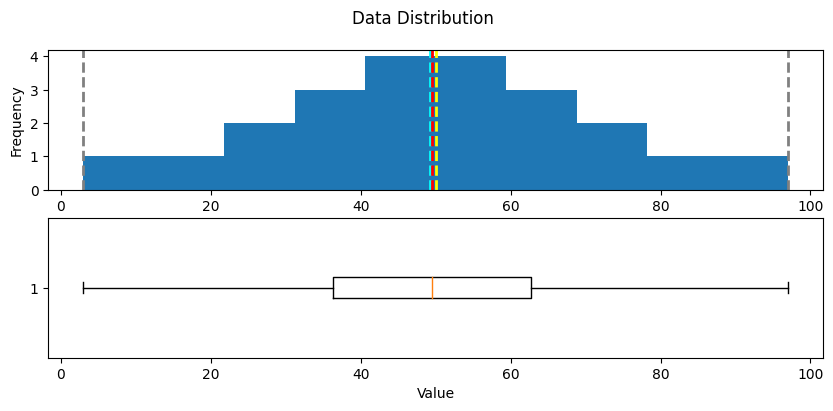

In [17]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_alunos['Grade']
# Call the function
show_distribution(col)

Todas as medidas de tendência central estão bem no meio da distribuição dos dados, que é simétrica, com os valores tornando-se progressivamente mais baixos em ambas as direções a partir do meio.

Para explorar esta distribuição com mais detalhes, você precisa entender que a estatística consiste fundamentalmente em coletar *amostras* de dados e usar funções de probabilidade para extrapolar informações sobre a *população* completa de dados.

O que isto significa? *Amostras* referem-se aos dados que temos em mãos, como informações sobre hábitos de estudo e notas desses 22 alunos. A *população* refere-se a todos os dados possíveis que poderíamos coletar, como as notas e hábitos de estudo de cada aluno em todas as instituições educacionais ao longo da história. Normalmente, estamos interessados ​​na população, mas simplesmente não é prático recolher todos esses dados. Em vez disso, precisamos tentar estimar como é a população a partir da pequena quantidade de dados (amostras) que temos.

Se tivermos amostras suficientes, podemos calcular algo chamado *função de densidade de probabilidade*, que estima a distribuição de notas para toda a população.

A classe **pyplot** do Matplotlib fornece uma função de plotagem útil para mostrar essa densidade.

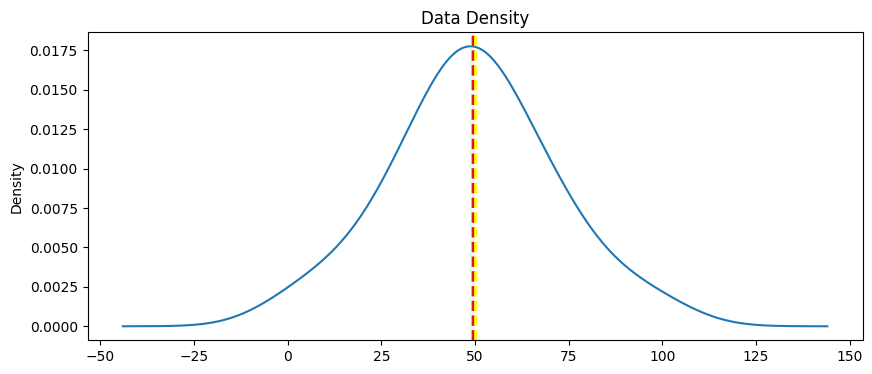

In [18]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_alunos['Grade']
show_density(col)

Como esperado do histograma da amostra, a densidade mostra a característica "curva em sino" do que os estatísticos chamam de distribuição *normal* com a média e a moda no centro e caudas simétricas.

## Resumo

Bom trabalho! Houve uma série de novos conceitos aqui, então vamos resumir.

Aqui nós:

1. Gráficos feitos com Matplotlib.
2. Aprendeu como personalizar esses gráficos.
3. Estatísticas básicas calculadas, como medianas.
4. Analisou a distribuição dos dados usando gráficos de caixa e histogramas.
5. Aprendeu sobre amostras versus populações.
6. Estimativa de como seria a população de séries a partir de uma amostra de séries.

Em nosso próximo caderno, veremos como identificar dados incomuns e encontrar relações entre os dados.

## Leitura Adicional

Para saber mais sobre os pacotes Python que você explorou neste notebook, consulte a seguinte documentação:

- [NumPy](https://numpy.org/doc/stable/)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib](https://matplotlib.org/contents.html)